In [1]:

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers



Using TensorFlow backend.
C:\Users\Sakeeb\anaconda3\envs\env_name\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Sakeeb\anaconda3\envs\env_name\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Sakeeb\anaconda3\envs\env_name\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Sakeeb\anaconda3\envs\env_

In [4]:
!pip install matplotlib


In [2]:

classifier = Sequential()



In [3]:


classifier.add(Convolution2D(32, 3,  3, input_shape = (64, 64, 3), activation = 'relu'))

C:\Users\Sakeeb\anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [4]:

classifier.add(MaxPooling2D(pool_size =(2,2)))

In [5]:

classifier.add(Convolution2D(64, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

C:\Users\Sakeeb\anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [6]:


classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

C:\Users\Sakeeb\anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [7]:

classifier.add(Flatten())

In [8]:

classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(10, activation = 'softmax'))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:

classifier.compile(
              optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
__________

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        r'C:\Users\Sakeeb\Documents\agrify\agrify\Data\train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        r'C:\Users\Sakeeb\Documents\agrify\agrify\Data\test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

model = classifier.fit_generator(
        training_set,
        steps_per_epoch=1,
        epochs=100,
        validation_data = test_set,
        validation_steps = 1
      )


In [2]:
model.summary()

NameError: name 'model' is not defined

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


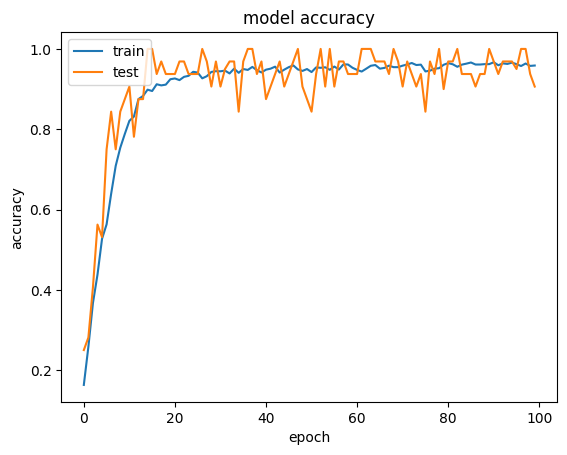

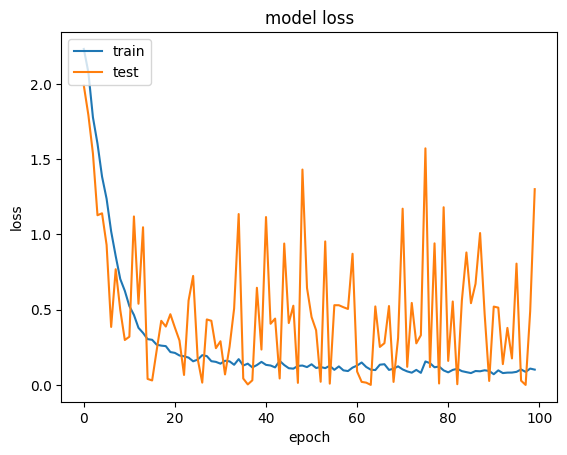

In [16]:

import h5py
classifier.save('Trained_Modelbh5')

print(model.history.keys())
import matplotlib.pyplot as plt


plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

